<a href="https://colab.research.google.com/github/luthf-ai/PCVK-Polinema-Jobsheet/blob/main/week03/Week03_Aido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NAMA : AIDO LUTHFI AL HAKIM
#KELAS : 3A TI
#NIM : 2141720136

##**PRAKTIKUM**

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 60


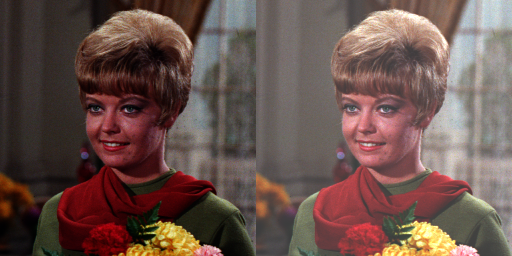

In [5]:


print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

##**TUGAS PRAKTIKUM**

###1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

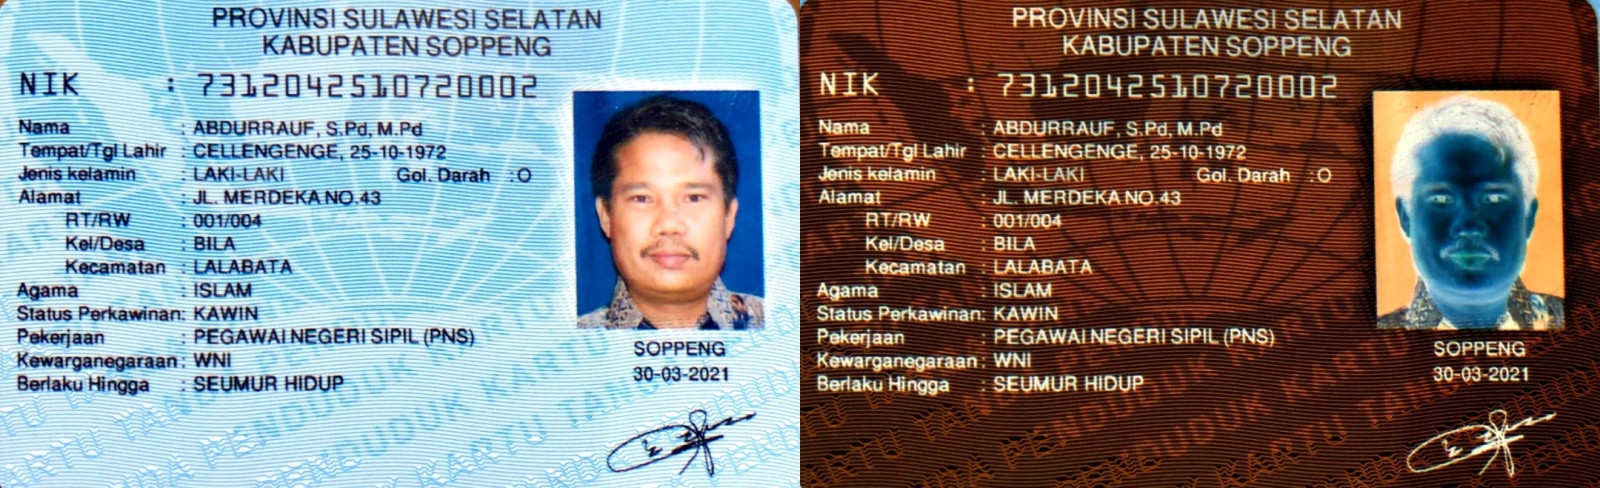

In [13]:
ktp = cv.imread('/content/drive/MyDrive/dummyktp.png')
inverse_ktp = np.zeros(ktp.shape, ktp.dtype)
for y in range(ktp.shape[0]):
  for x in range(ktp.shape[1]):
    for c in range(ktp.shape[2]):
      inverse_ktp[y,x,c] = np.clip(255 - ktp[y,x,c], 0, 255)

final_ktp = cv.hconcat((ktp, inverse_ktp))
cv2_imshow(final_ktp)

###2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut:

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan[-255 - 255]: 50
Masukkan nilai kontras[1.0-3.0]: 2


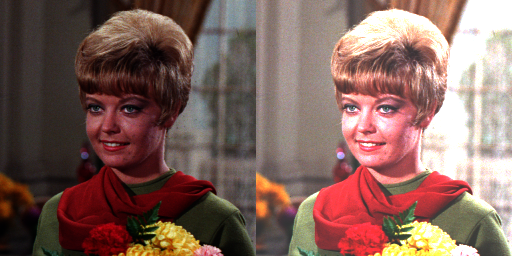

In [9]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan[-255 - 255]: '))
  contrass = float(input('Masukkan nilai kontras[1.0-3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
final_image = np.zeros(original.shape, original.dtype)

final_image = cv.convertScaleAbs(original, alpha=contrass, beta=brightness)


final_frame = cv.hconcat((original, final_image))
cv2_imshow(final_frame)

###3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra dengan transformasi log
----------------------------------
Masukkan nilai kecerahan[-255 - 255]: 50


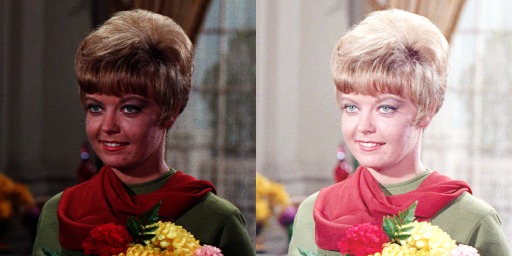

In [12]:
import math

print(' Mengubah tingkat kecerahan citra dengan transformasi log')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan[-255 - 255]: '))
except ValueError:
  print('Error, not a number')


original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
final_image = np.zeros(original.shape, original.dtype)
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            original_value = original[y, x, c]
            new_value =  brightness* math.log(1 + original_value)
            final_image[y, x, c] = np.clip(new_value, 0, 255)

final_frame = cv.hconcat((original, final_image))
cv2_imshow(final_frame)

###4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

####Averaging

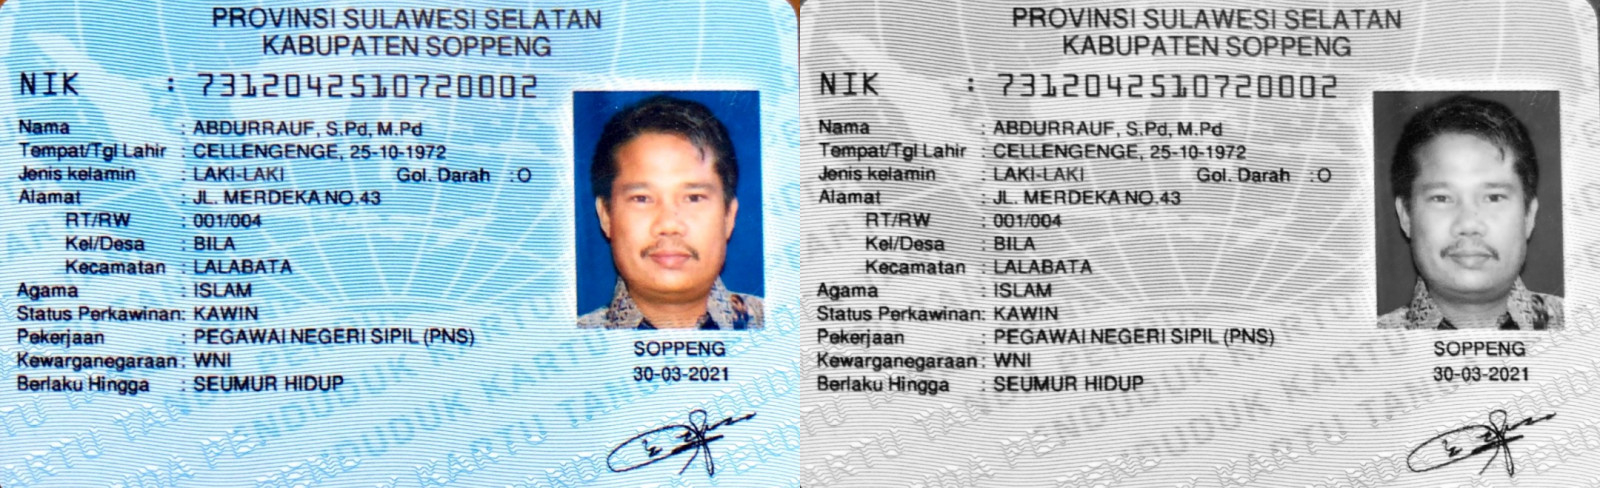

In [16]:
ktp = cv.imread('/content/drive/MyDrive/dummyktp.png')
height, width, _ = ktp.shape
grayscale_avg = np.zeros((height, width), dtype=np.uint8)

# Convert to grayscale by taking the average of color channels
for y in range(height):
    for x in range(width):
        # Get the color channels (B, G, R)
        blue, green, red = ktp[y, x]

        # Calculate the average value
        gray_value = int((int(blue) + int(green) + int(red)) / 3)

        # Set the grayscale pixel value
        grayscale_avg[y, x] = gray_value
result = np.concatenate((ktp, cv.cvtColor(grayscale_avg, cv.COLOR_GRAY2BGR)), axis=1)
cv2_imshow(result)

####Lightness

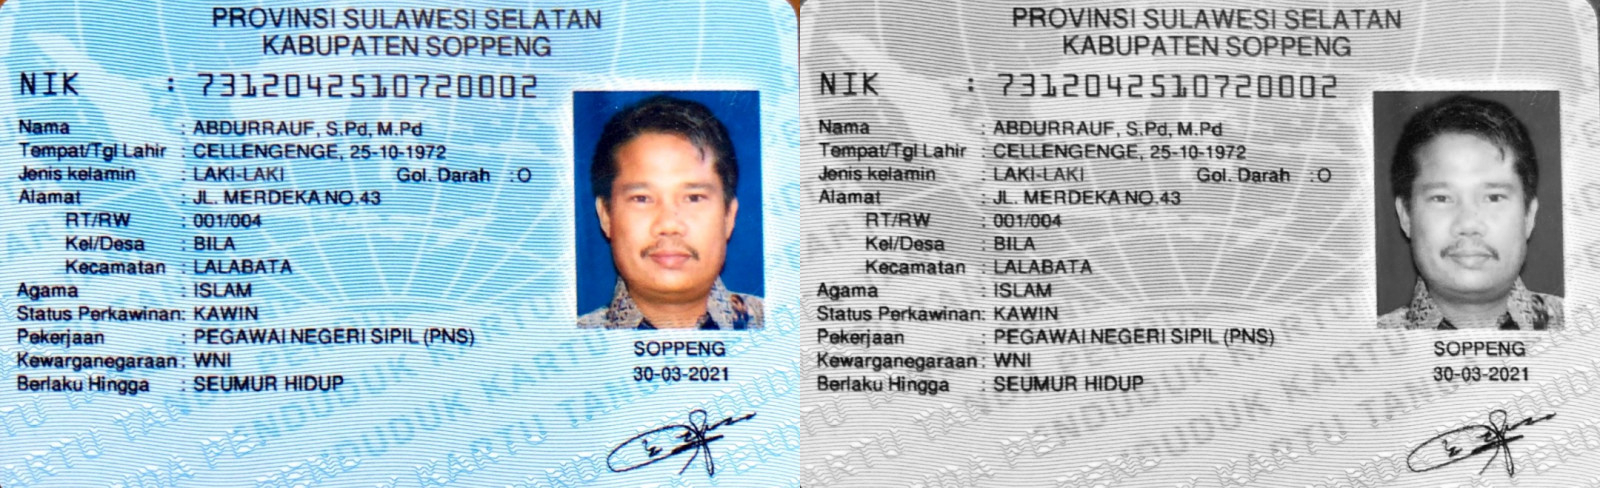

In [23]:
ktp = cv.imread('/content/drive/MyDrive/dummyktp.png')
height, width, _ = ktp.shape
# Calculate the maximum and minimum values of all pixels in the image
max_pixel_value = np.max(ktp)
min_pixel_value = np.min(ktp)

# Create an empty grayscale image with the same dimensions
grayscale_maxmin = np.zeros((height, width), dtype=np.uint8)

# Convert to grayscale by taking the lightness (max and min of all pixels)
for y in range(height):
    for x in range(width):
        lightness = (int(np.max(ktp[y, x])) + int(np.min(ktp[y, x]))) // 2
        grayscale_maxmin[y, x] = lightness

result = np.concatenate((ktp, cv.cvtColor(grayscale_maxmin, cv.COLOR_GRAY2BGR)), axis=1)
cv2_imshow(result)

####Lightness

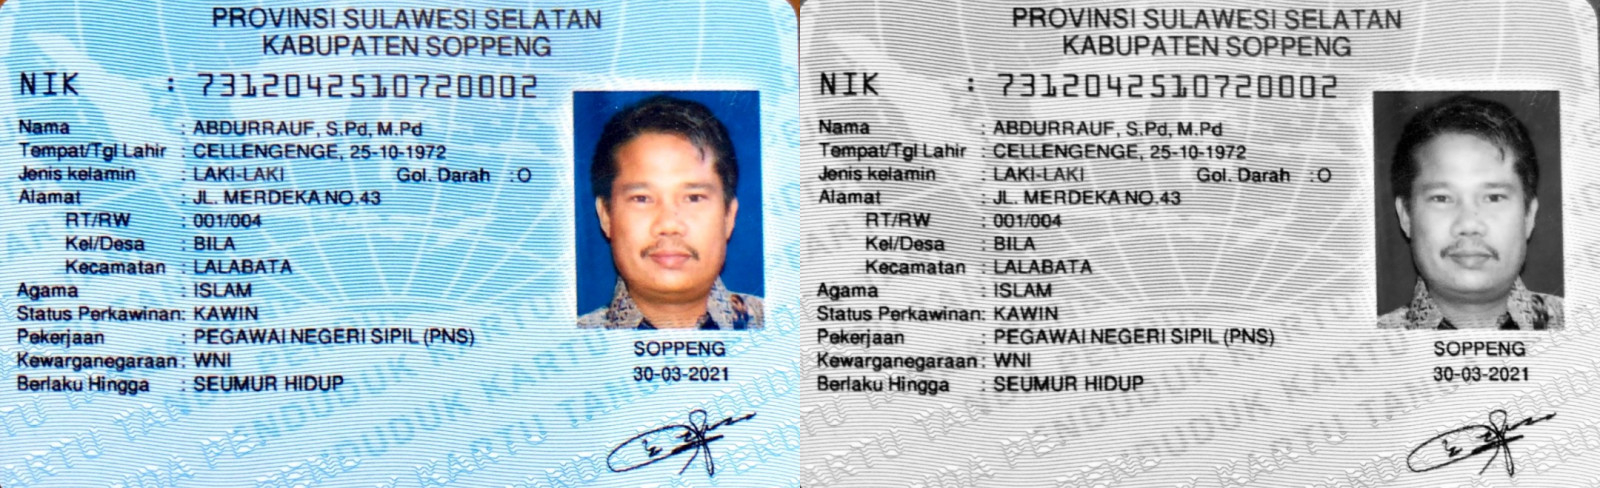

In [24]:
ktp = cv.imread('/content/drive/MyDrive/dummyktp.png')
height, width, _ = ktp.shape
grayscale_lumianance = np.zeros((height, width), dtype=np.uint8)

#value setiap channel
r = 0.21
g = 0.72
b = 0.07

for y in range(height):
    for x in range(width):
        blue, green, red = ktp[y, x]
        luminance = blue*b + green*g + red*r
        grayscale_lumianance[y, x] = luminance

result = np.concatenate((ktp, cv.cvtColor(grayscale_lumianance, cv.COLOR_GRAY2BGR)), axis=1)
cv2_imshow(result)

###5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

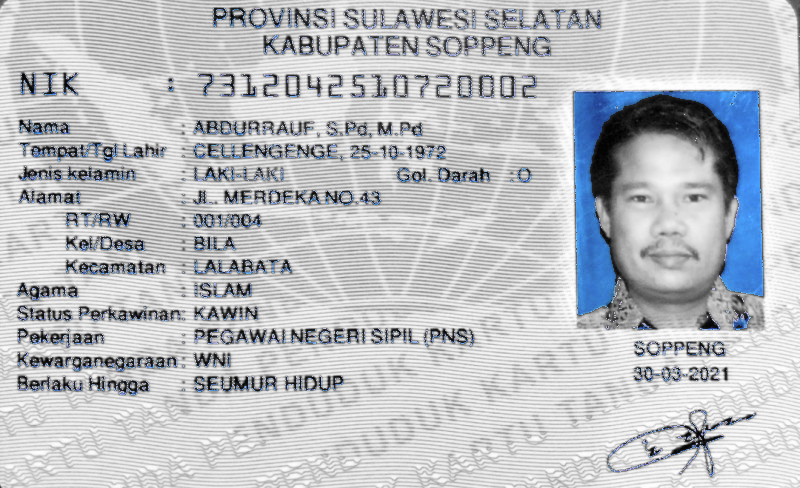

In [49]:
ktp = cv.imread('/content/drive/MyDrive/dummyktp.png')

# Define the range of blue color (adjust these values as needed)
lower_blue = np.array([100, 0, 0])
upper_blue = np.array([255, 100, 100])

# Create a mask for blue pixels
mask_blue = cv.inRange(ktp, lower_blue, upper_blue)

# Convert the blue pixels to grayscale
blue_pixels = cv.bitwise_and(ktp, ktp, mask=mask_blue)

# Convert the rest of the image to grayscale
gray_mask = cv.cvtColor(cv.bitwise_not(mask_blue), cv.COLOR_GRAY2BGR)
gray_image = cv.cvtColor(ktp, cv.COLOR_BGR2GRAY)
gray_image = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)

# Combine the blue pixels and grayscale regions
result_image = cv.add(gray_image, blue_pixels)
cv2_imshow(result_image)